# Thermodynamical Background and Model

In this first part of the project, our objective is to develop a simple model of the drying process of a drying machine. For reference, we will be focusing on the **Ken Energy Systems IQ6 Washer Disinfector**. This model, although very fundamental, will serve us as a first step towards developing a more sophisticated simulation, with our final objective being the development of a **digital twin** of the machine, which will combine the physics-based simulation and machine learning methods trained on empirically-obtained data to emulate virtually the machine with as little error as possible.

## About the Machine and Wet Material

The type of dryer considered is a **convective, forced-air, batch, tray dryer**, meaning the objects placed inside (by batches on trays) are dryed by letting hot and dry air to flow over the wet material, which in turn will heat it up, evaporating water, and removing any moisture via convection. Although drying agents (including a different gas mixture) can speed the process, in our case we will be considering air. We will also be ignoring the effects of natural convection (resulting in a mixed convection process) since we will be assuming the air flow velocity due to the external fan will be much greater than the vertical velocity of the air due to natural convection.

To simplify the model, we will be considering **constant drying parameters**, that is, the inflow of air occurs at constant velocity and with constant properties (temperature and humidity), and **constant air properties**, that is, the temperature and humidity of the air inside the chamber is considered a constant over the spatial dimensions (effectively, we consider average temperatures and humidities for the air).

As the main use of this machine is to clean and disinfect medical and surgical tools, we will also assume we are dealing with **stainless steel** materials (or, at least, similar to it). This allows us to assume that the material to be dried is **homogeneous, non-porous, non-hygroscopic**, and the water content is located exclusively at its surface as a thin water layer. We ignore any interactions between the water and the metallic surface (chemical or otherwise), and assume no water content inside the material (there are no pores).

## Drying Process

**Drying** can be defined as the separation of moisture from wet surfaces, in our case via evaporation. In a convective dryer, a simultaneous transfer of heat and mass occurs during the drying process:

- **Heat transfer**: after putting into contact the drying medium (air) with the wet solid, a temperature gradient sets in and energy in the form of heat is transferred from the hot air to the colder solid. In a convective dryer, this process will occur mainly via **convective heat transfer**. This increases the thermal agitation of the water molecules situated on the thin layer of moisture on the surface of the solid, and allows for evaporation.

- **Mass transfer**: the water molecules from the surface of the solid move outwards due to a concentration gradient that sets in between the solid and the surrounding air. These molecules will therefore diffuse into the air and are transported out of the chamber via advection. The mass transfer process that combined this diffusion and advection is the **convective mass transfer**. This process continues until the solid is completely dry.

The **drying rate** is defined as the mass of water that is removed from the solid per mass of dry solid and per unit time, and it measures how well the dryer is able to dry the solid. In our case, this drying rate depends mainly on the external drying conditions: temperature, humidity, and velocity of the inlet air flow.

## Convective Heat Transfer

The main heat transfer process in the drying chamber will be convection between the hot air coming into contact with the colder objects inside. This process is governed by the so-called Newton's cooling equation:
$$
\boxed{ \frac{dQ^{\text{conv}}}{dt} = \dot{Q}^{\text{conv}} = h_{\text{conv}}\,A_s\,\Big[T_s(t) - T_a(t)\Big] }
$$

where:
$$
\begin{align*}
&\dot{Q}_{\text{conv}}: \text{rate of heat transfer} \\
&h_{\text{conv}}: \text{ heat transfer coefficient} \\
&A_s: \text{ effective surface area in contact with environment} \\
&T_s: \text{ temperature of the surface} \\
&T_a: \text{ temperature of the surrouding airflow} \\
\end{align*}
$$

The main difficulty in operating with this equation is the determination of the total effective area of the object (which can be complicated to estimate for complex geometries), and the determination of the heat transfer coefficient, which depends on multiple external and difficult to solve analitically processes.

### Heat Transfer Coefficient

This coefficient, which includes all geometrical and fluid-dynamic behaviour of the particular system, can be determined in the main ways: 
- Empirically via measurements of the temperature change over time in an experimental setup.
- Using complex computational fluid dynamics (CFD) simulations.
- Via empirical correlations for simplified geometries.

Let's briefly dive deeper into the possible correlations we can use. The main idea is to consider a simplified geometry for our objects and compute the heat transfer coefficient relating it to different dimensionless quantities which we can estimate using external parameters.

We begin by defining **Reynold's number** as the ratio between the internal and viscous forces in the fluid:
$$
\boxed{ \text{Re} = \frac{u L}{\nu} = \frac{\rho u L}{\mu} }
$$

where:
$$
\begin{align*}
&\rho: \text{ density of the fluid} \\
&\nu: \text{ kinematic viscosity of the fluid } \\
&\mu: \text{ dynamic viscosity} \\
&u: \text{ airflow speed} \\
&L: \text{ characteristic length, for example in this case, length of the plate}
\end{align*}
$$

Typically, low Reynold's numbers indicate laminar flow (where air particles travel in parallel paths), while higher values tend to represent turbulent flows.

**Prandtl's number** quantifies the ratio of moment diffusivity to thermal diffusivity:
$$
\boxed{ \text{Pr} = \frac{\nu}{\alpha} = \frac{c_p \mu}{k} }
$$

where
$$
\begin{align*}
&\alpha: \text{ thermal diffusivity } \\
&k: \text{ thermal conductivity } \\
&c_p: \text{specific heat}
\end{align*}
$$

Finally, **Nusselt's number** is the ratio of total heat transfer to conductive transfer at the boundary of a fluid. It can be written as:
$$
\begin{align*}
\boxed{ \text{Nu} = \frac{hL}{k} }
\end{align*}
$$

from which we can obtain the convective heat transfer coefficient $h$ using a correlation. For example, the average Nusselt number for laminar flow over a flat plate is:
$$
\overline{\text{Nu}} = \frac{hL}{k} = 0.664\,\text{Re}^{1/2}\,Pr^{1/3} \implies h = \frac{0.664\,k\,\text{Re}^{1/2}\,\text{Pr}^{1/3}}{L} 
$$


## Latent heat, vaporization, and heat losses

Apart from convective heat transfer, two more processes will take place inside the chamber. 

Some of the heat transferred from the air to the water on the surface of the solid will be used to heat up the water. In our case, the solid will increase its temperature according to:
$$
\boxed{ \dot{Q}^{\text{heat}} = M_s\,C_{p,s}\,\Big( T_a - T_s \Big) }
$$

where:
$$
\begin{align*}
&M_s: \text{ mass of the solid} \\
&C_{p,s}: \text{ specific heat capacity of the solid} \\
&T_a, T_s: \text{ temperatures of the air and solid, respectively}
\end{align*}
$$

Note: as air loses heat due to convection, this equation will also give us its temperature change over time.

Another portion of the transferred heat will be used in the phase change of the water from liquid to vapor, with this heat being related to the latent heat of vaporization by the following equation:
$$
\boxed{ \dot{Q}^{\text{vap}} = M_w\,L_v}
$$

where:
$$
\begin{align*}
&L_v: \text{ latent heat of vaporization} \\
&M_w: \text{ mass of water}
\end{align*}
$$

Lastly, some heat will be lost to the environment due to **heat losses**, which can happen for example by heat escaping to the environment through the walls of the drying chamber. We denote this term simply by:
$$
\begin{align*}
\boxed{ \dot{Q}^{\text{loss}} }
\end{align*}
$$


## Mass Transfer

Since the objects we will be drying are non-porous and non-hygroscopic, we can assume the water content is spread out uniformly as a thin layer over all the surface of the object. Over time, the water molecules will vaporize from the surface and exit the chamber via combined diffusion and advection, which can be described using the mass transfer equation:
$$
\boxed{ \frac{dm_w}{dt} = h_m\,A_s\,(X_{w,s}(t) - X_{w,a}(t)) }
$$

where:
$$
\begin{align*}
&h_m: \text{ mass transfer coefficient} \\
&A: \text{ effective surface area} \\
&X_{w,s}: \text{ water concentration at surface of solid} \\
&X_{\infty}: \text{ water concentration in surrounding air}
\end{align*}
$$

Similar to how we used correlations to obtain an estimation of the heat transfer coefficient, we can again use a series of dimensionless numbers to estimate the mass transfer coefficient for simple-enough system configurations. 

In particular, the relevant quantities here are now the **Sherwood number**:
$$
\begin{equation*}
\boxed{ \text{Sh} = \frac{h_m\,L}{D_{AB}} }
\end{equation*}
$$

where $D_{AB}$ is the diffusivity for substance $A$ in $B$. Also, we consider the **Reynolds number** (which was already defined previously), and the **Schmidt number**:
$$
\begin{equation*}
\boxed{ \text{Sc} = \frac{\mu}{\rho\,D_{AB}} }
\end{equation*}
$$

For example, a correlation for a flat plate with parallel laminar airflow is given by:
$$
\text{Sh} = \frac{h_m\,L}{D_{AB}} = 0.664\,\text{Re}^{1/2}\,\text{Sc}^{1/3} \implies h_m = \frac{ 0.664\,\text{Re}^{1/2}\,\text{Sc}^{1/3}\,D_{AB} }{L}
$$

## State characterization

The main input parameters are the temperature of the air being inserted into the chamber, the humidity of the air (either absolute or relative, depending on which one we can measure), and the velocity of the air or inflow. The *input* state is given by $x_{\text{in}} = ({T_d}^{\text{in}}, {H_A}^{\text{in}} = 0)$. 

The input temperature of the air will be equal to the design temperature $T_d$ chosen on the drying machine. We also want the inflowing air to be dry so that a maximum amount of water can be absorbed in it, and therefore the input air absolute humidity must be as close to $H_A = 0$ as possible. 

The velocity of the air $v_{\text{air}}$ is a parameter which we will consider constant during the whole process.

The output state is defined as the state of the air coming out of the drying chamber, which we will consider a good approximation of the actual air inside. It will be characterized by the temperature and humidity of the expelled air. The *output* state is given by $x_{\text{out}} = (T^{\text{out}}, {H_A}^{\text{out}})$.

Although we don't know initially the velocity of the air coming out (this would need additional measurements of CFD simulations), we can assume that it will be proportional to the inlet airflow velocity:
$$
v^{\text{in}} = \alpha v^{\text{out}}
$$

with $0 < \alpha < 1$, although we can consider $v^{\text{in}} \approx v^{\text{out}}$ as a good first approximation.


## Energy and Mass Conservation

As we know, in physical systems, both total mass and energy must be conserved. This can be studied in detail by writing the mass and energy balance equations relevant to our thermodynamical system. In principle, both the mass and energy initially coming into our system must be equal to the total mass and energy in the final state, coming out of the chamber. 

Furthermore, we can divide our system into two, smaller subsystems: the solid and the air in the chamber. This means that we must write a mass and energy conservation balance equation for both the solid and air subsystems, giving us the four necessary parameters to characterize the drying process: solid and air temperature, water content on solid, water content in air.

In our system, we have that the wet solid always remains inside the chamber, so we only have to deal with the air coming into the system (along with which water will also be inserted in very small amounts) and the air coming out of the system, with the corresponding evaporated water.

The energy balance of our system will be governed by the **First Law of Thermodynamics**, which states that the internal energy of the system must be equal to the heat transferred into it minus any kind of work the system has performed:
$$
\Delta U = Q - W
$$

However, in our case, we are dealing with an open system, where matter can flow in and out in a continuous way. In this case, the first law of thermodynamics takes on the following form:
$$
\frac{dU^{\text{total}}}{dt} = \dot{m}^{\text{in}}\,h^{\text{in}} - \dot{m}^{\text{out}}\,h^{\text{out}} + \dot{Q}
$$

where $\dot{m}^{\text{in/out}}$ is the mass flow in and out of the system, $h^{\text{in/out}}$ is the specific enthalpy, and $\dot{Q}$ is the heat exchanged between the system and the environment (we have already assumed that no work is performed on or by the system, and therefore all work terms vanish).

# Drying of Non-Porous Non-Hygroscopic Flat Slab via Forced Convection with Parallel Airflow under Constant Drying Conditions

References:
- [Mathematical modelling and simulation for the drying process
of vegetable wholesale by-products in a rotary dryer - A. Iguaz, A. Esnoz, G. Martínez, A.López, P. Vírseda]

In order to simulate our drying process, we will consider a simplified model that allows us to solve the equations numerically and study the change in temperature and humidity in the system over time. To do so, we will choose a configuration for which we can estimate the convective heat and mass transfer coefficients. The idea is to study the drying process of a non-porous, non-hygroscopic flat metallic slab via forced convection with parallel airflow under constant drying conditions.

While this doesn't exactly provide us with a solution to the drying of multiple objects with differing shapes and sizes, the idea is to use this model to obtain an estimation of how the drying process looks like, and by modifying some relevant parameters approach the real drying data as close as possible.

In particular, our hope is that, by changing the parameter $A_s$ corresponding to the surface area of the slab, we can find a value for it which approximates the effective surface area of the objects inside the dryer. The parameters $h_c$ and $h_m$ will hopefully account for the differences in the airflow properties and changes in geometry between this simplified model and the real system. These parameters can be found either by simply "guessing" and calculating reasonable estimations, or using machine learning algorithms that try to optimize the parameters to fit as well as possible the real drying curves obtained in previous measurements.

The model assumes that the air and solid remain always at the same temperature, so no additional conduction or convection between the solid and water layer is necessary. Constant (external) drying conditions are assumed, meaning the inlet veloctiy, temperature, and humidity are always the same. Inside the chamber, constant air properties are considered, meaning that we assume the temperature and humidity of the air is the same in any spatial point inside the dryer, and we assume that the air properties inside the chamber will not change significantly with respect to the air coming out of the chamber.

The following diagram visually describes the system in question:

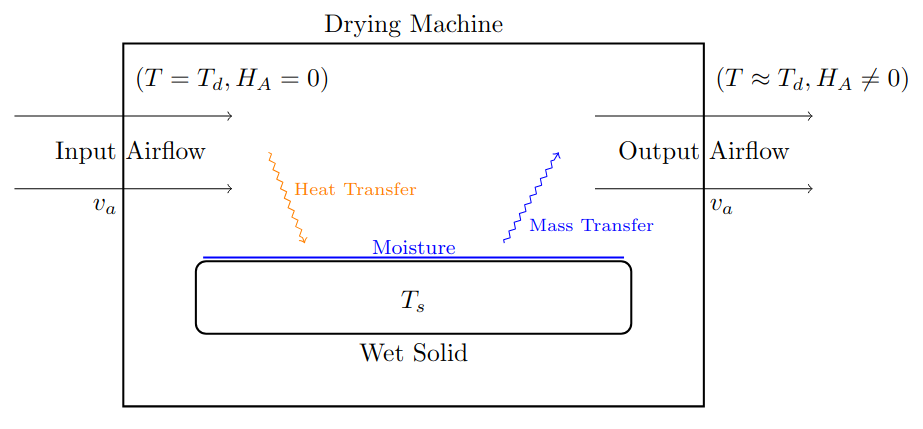

In [3]:
from IPython.display import Image, display
display(Image(filename='./diagram/model_flat.png', embed=True))

In this model, we will assume heat transfer occurs via convection between the surrounding air and only the water layer surface on top of the object (ignoring other heat transfer processes between the air and the side of the objects, the tray, etc.). We will also consider the water layer thin enough as to ignore convection inside of it, and assume the solid is the same temperature as the water always and changes temperature uniformly (which is a good approximation for thin objects). Furthermore, radiative heat transfer from other objects, trays, or walls, is ignored (at least for now).

## Mass Balance

### Water content on the solid

The amount of water of the solid inside the drying chamber will remain constant over time except for a small decrease in weight due to evaporation of the water mass from a thin layer on its surface. 

The amount of water present per mass of dry solid is written as an equivalent "moisture content" $W(t)$ measured in [kg water / kg dry solid]. The total mass of water on the object initially is therefore given by $M_s\,W(t)$ [kg water]. We also know that the total mass of the solid at any time $m_s(t)$ [kg total] is given by the mass of dry solid $M_s$ [kg dry solid], which is a constant, plus the amount of water on it $m_w(t)$ [kg water], given by the product between the dry solid mass $M_s$ and the moisture content $W(t)$. The change with respect to time of this quantity will therefore give us the mass balance equation:
$$
\begin{align*}
\frac{dm_s(t)}{dt} &= \frac{d}{dt}\Big( M_{s} + m_w \Big) = \frac{dm_w}{dt} \\
&= \frac{d(M_s\,W(t))}{dt} = M_s\frac{dW(t)}{dt} \\
&= \dot{m}_w
\end{align*}
$$

which is just the definition for the **rate of drying**:
$$
\frac{dW(t)}{dt} = -R_w
$$

The main problem here is that the rate of drying heavily depends on parameters such as the geometry of the system, how the objects are arranged in the chamber, the number of items, etc. Therefore, we must find a way to estimate this parameter. In this case, we will make use of the previously explained equation for mass transfer in convective systems:
$$
\dot{m}_w = h_{m}\,A\,\Big( X_{w,s}(t) - X_{w,a}(t) \Big)
$$

This previous equation relates the rate of change of the water vapor evaporated from the surface with two constants (effective area and mass transfer coefficient), and its magnitude depends on the concentration $X_{w,s/a}$ of water in both the solid surface and the surrounding air. However, we can express the water concentrations in multiple ways, and the units of the coefficient will correct for that.

<span style="color:red">(main problem for now: can't use W(t) and (SH)(t) as they have different units!)</span>

### Water content in the air

We have a certain amount of air coming into the system, with very low (although not necessarily zero) humidity. We will also have a certain amount of water vapor coming out of the system with the outlet airflow, which increases due to evaporation. This can be written as:
$$
\frac{d(m_s(t)\,W(t))}{dt} = m_s\frac{dW(t)}{dt} + W(t)\frac{dm_s(t)}{dt} = m_s(t)\frac{dW(t)}{dt} + W(t)\frac{dm_w(t)}{dt} = \dot{M}_a^{\text{in}}(SH)^{\text{in}} - \dot{M}_a^{\text{out}}\,(SH)^{\text{out}}(t) + \dot{m}_w
$$

where $W$ is the moisture content of the solid measured in [kg water / kg solid], $\dot{m}_w$ is the change of water mass per unit time [kg water / kg dry solid / s], and $\dot{M}_a^{\text{in/out}}$ refers to the mass flow rate (mass of air coming into the system per unit time), measured in [kg air / s]. 

### Mass inflow rate of air

In the previous equation, we find the parameters $\dot{M}_a^{\text{in/out}}$ which tell us how much air is coming in and out of the drying chamber. We can estimate its value easily if we know certain parameters of the system. In particular, if we assume air comes in (and out) via tubes with a circular cross section, and if we know the composition (density) of the air and its velocity, we can write an expression for this mass inflow rate as follows:
$$
\dot{M}_a^{\text{in(out)}} = \frac{ \rho_a^{\text{in(out)}}\,(\alpha)\,v_a^{\text{in(out)}}\,\pi\,(D^{\text{in(out)}})^2 }{4}
$$

To obtain the density of air in the in and out states, we can either use numerical approximations (e.g. *Cantera* package in *Python*) or use the approximations such as:
$$
\rho_{a}(T, (SH)) \approx \frac{\rho_{\text{dry air}}(T)}{1 + 0.61\,(SH)}
$$

where $(SH)$ refers to the specific humidity of the air [kg water / kg dry air].

## Mass Balance Equations

Combining all these facts, we arrive at the mass balance equations for our system:
$$
\begin{align*}
\frac{dW(t)}{dt} &= \frac{h_m\,A}{M_s}\Big[ W(t) - (SH)(t) \Big] \\
\frac{d(SH)(t)}{dt} &= \frac{1}{M_a}\Bigg\{ \dot{M}_a^{\text{in}}\,(SH)^{\text{in}} - \dot{M}_a^{\text{out}}\,(SH)(t) + \frac{h_m\,A}{M_s}\Big[W(t) - (SH)(t) \Big] \Bigg\}
\end{align*}
$$

where $A$ is an effective total convective surface area, $\dot{M}_a^{\text{in/out}}$ is the mass inflow/outflow rates, $(SH)(t)$ is the specific humidity, $W(t)$ is the water content of the solid, $M_s$ is the mass of the dry solid, $M_a$ is the mass of air inside the chamber. This system of coupled ordinary first-order differential equations can be solved providing appropriate initial conditions for $W(t = 0) = W_0$ and $(SH)(t=0) = (SH)_0$.

## Energy Balance

### Energy balance in the solid

The change in enthalpy of the solid object is going to be equal to the enthalpy of the product entering and exitin (which will be zero in this case), the heat gained from the transfer between air and solid, heat lost to increase the temperature of the water, heat lost due to vaporization of the water, and any other heat loss. Mathematically:
$$
...
$$

### Energy balance in the air

The enthalpy change of air will be equal to the enthalpy of air entering into the chamber, enthalpy of air leaving the chamber, heat lost to the solid via convection, and enthalpy of increasing the water vapor to the temperature of the air. We can write this balance as:
$$
...
$$

<span style="color:red">(develop the equations!)</span>

# Alternative approaches to the Digital Twin problem

Our objective is to develop a program that can emulate as close as possible the drying machine. In principle, we can try to solve the previously given equations (either numerically or analitically) and obtain the evolution of the temperature and humidity of the objects and air as a function of time. However, some parameters in these equations are complicated to estimate exactly, and therefore alternative approaches were considered which make use of the available data from measurements of various drying cycles and machine learning algorithms (in particular, neural networks).

## Physics Informed Neural Network

The main idea behind this approach is to create a simple, feed-forward neural network that we will train using the measurements database and implement physical constraints on the solutions to improve its accuracy. In particular, the idea is to incorporate the previously described system of equations in order to limit the possible solutions. This is done when computing the loss (cost) function of the neural network, and rewarding the network for solutions that are close to those given by the differential equations.

To do this, we must first rewrite the system of equations as follows:
(...)

It would be interesting if this neural network could compute the parameters in these differential equations, essentially by performing a fitting ot the data to the model 

<span style="color:red">(check up on this)</span>

## Recurrent Neural Network Forecasting

The other alternative would be to create a recurrent neural network that enables us to predict future values in a time series. If we could train this network on multiple measurements, maybe it could be possible to treat new input as "real time" data gathering. This would enable us to implement the model into the machine as a real time predictor of the moisture and temperature values, and it would continuously improve the prediction as more data was available.

<span style="color:red">(main problems for now: can I train using different time series, each of which was obtained using different parameters / configurations? Implement somehow knowledge about the duration of each phase / cycle?)</span>